## Observations and Insights

In [154]:
Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study.

SyntaxError: invalid syntax (<ipython-input-154-a52f17879130>, line 1)

## Dependencies and starter code

In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data_combined = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
study_data_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#sd=study_data_combined
group_sd= study_data_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"]
group_sd.head()


pd.DataFrame({
    "mean":group_sd.mean(),
    "median":group_sd.median(),
    "variance":group_sd.var(),
    "std":group_sd.std(),
    "sem":group_sd.sem()
})

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

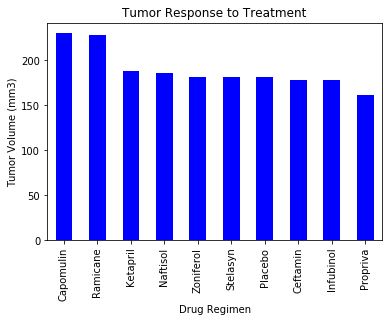

In [188]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_reg = study_data_combined["Drug Regimen"].value_counts()
treatment_bar_graph = treatment_reg.plot(kind="bar", facecolor="blue")

plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

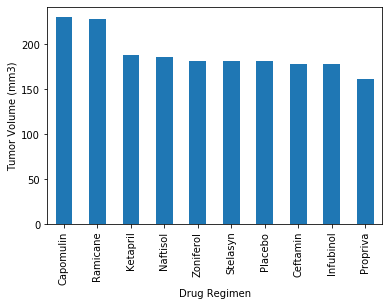

<Figure size 432x288 with 0 Axes>

In [189]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


treatment_reg_plt_chart = treatment_reg.plot(kind='bar')

# Set the xlabel and ylabel using class methods
treatment_reg_plt_chart.set_xlabel("Drug Regimen")
treatment_reg_plt_chart.set_ylabel("Tumor Volume (mm3)")


plt.show()
plt.tight_layout()




## Pie plots

In [190]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = pd.DataFrame(study_data_combined["Sex"].value_counts())
gender_count

,Sex
Male,958
Female,935


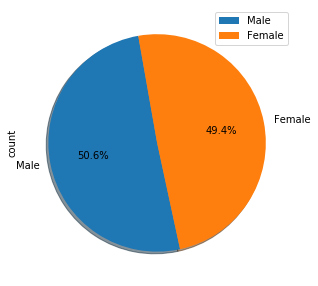

In [191]:

gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)

([<matplotlib.patches.Wedge at 0x1d1aaa3f388>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

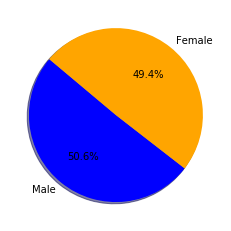

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958,935]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = ( 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)







## Quartiles, outliers and boxplots

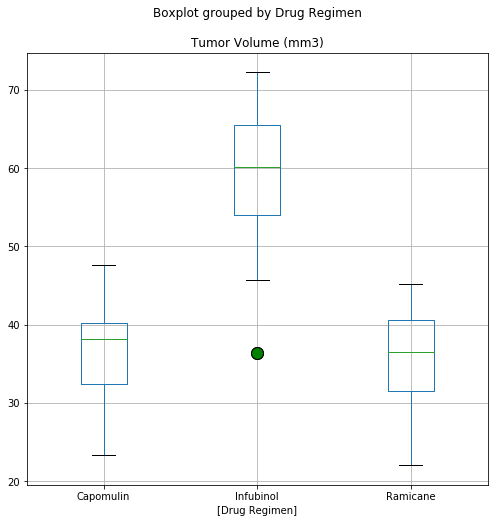

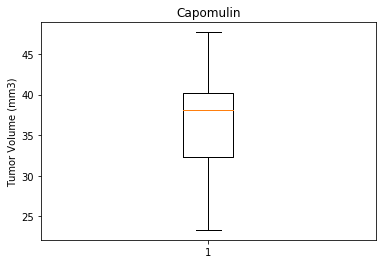

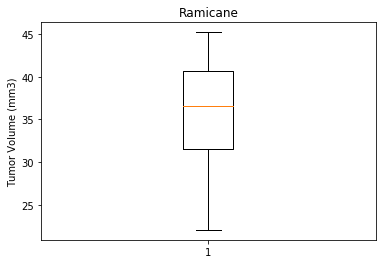

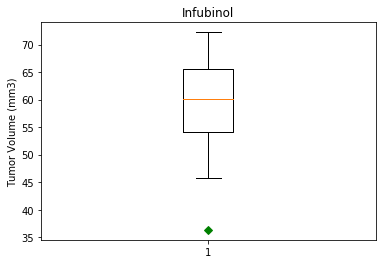

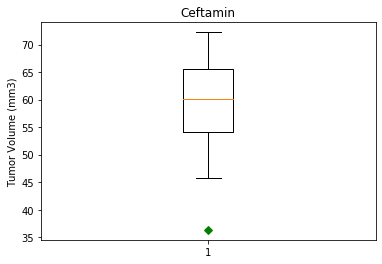

In [193]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

df = study_data_combined
df_2 = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
capo = df_2.loc[df_2['Drug Regimen'] == 'Capomulin']
capo = capo.groupby("Mouse ID").tail(1)
#print(capo)
df_2 = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
rami = df_2.loc[df_2['Drug Regimen'] == 'Ramicane']
rami = rami.groupby("Mouse ID").tail(1)
#print(rami)
df_2 = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
infu = df_2.loc[df_2['Drug Regimen'] == 'Infubinol']
infu = infu.groupby("Mouse ID").tail(1)
#print(capo)
df_2 = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
cefta = df_2.loc[df_2['Drug Regimen'] == 'Ceftamin']
cefta = infu.groupby("Mouse ID").tail(1)
#print(capo)


# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
combined = capo[['Tumor Volume (mm3)',"Drug Regimen"]]
combined = combined.append(rami[['Tumor Volume (mm3)',"Drug Regimen"]])
combined = combined.append(infu[['Tumor Volume (mm3)',"Drug Regimen"]])
combined = combined.append(cefta[['Tumor Volume (mm3)',"Drug Regimen"]])
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                 linestyle='none')
combined.boxplot(by="Drug Regimen", flierprops=flierprops, figsize=(8,8))
plt.show()
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capo['Tumor Volume (mm3)'], 0, 'gD')
plt.show()
fig2, ax2 = plt.subplots()
ax2.set_title('Ramicane')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(rami['Tumor Volume (mm3)'], 0, 'gD')
plt.show()
fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(infu['Tumor Volume (mm3)'], 0, 'gD')
plt.show()
fig4, ax4 = plt.subplots()
ax4.set_title('Ceftamin')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(cefta['Tumor Volume (mm3)'], 0, 'gD')
plt.show()

## Line and scatter plots

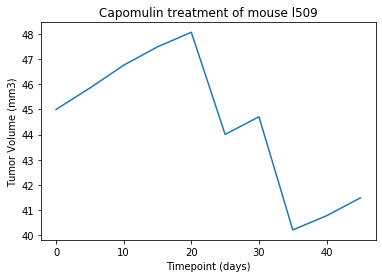

In [194]:


cap_table=study_data_combined.loc[study_data_combined["Drug Regimen"]=="Capomulin"]
id_l509=cap_table.loc[cap_table["Mouse ID"]=="l509"]
plt.plot(id_l509["Timepoint"],id_l509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
#plt.savefig("Charts/Mouse_l509_Capomulin_Treatment.png")
plt.show()


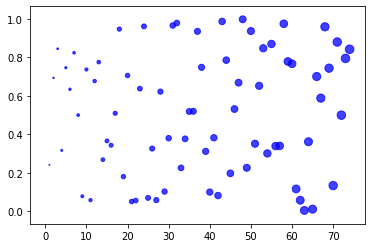

In [195]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

x_limit = 75
x_axis = np.arange(0, x_limit)
#y_values = study_data_combined['Tumor Volume (mm3)']
y_values = [random.random() for value in x_axis]
plt.scatter(x_axis, y_values, marker="o", facecolors= "blue",
            s=x_axis, alpha=0.75)
plt.show()



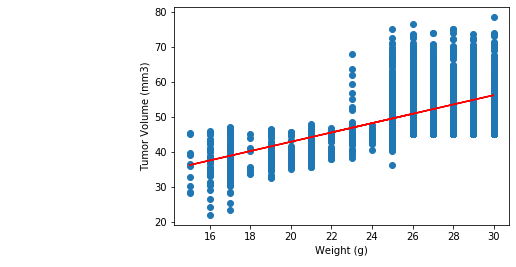

In [196]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = np.arange(0, x_limit)
y_values = [random.random() for value in x_axis]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_values, marker="o", facecolors= "blue",
            s=x_axis, alpha=0.75)
#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()